In [ ]:
import pandas as pd
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy, scipy.stats

Reading path of data

In [ ]:
path_gm = '/content/drive/MyDrive/Beca - Diplomado - UTEC/Módulo V/csv files/data_severity_pathol_prob_gm.csv'
path_om = '/content/drive/MyDrive/Beca - Diplomado - UTEC/Módulo V/csv files/data_severity_pathol_prob_om.csv'

df_data_gm = pd.read_csv(path_gm)
df_data_om = pd.read_csv(path_om)

In [ ]:
df_data_gm

,filename,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Lung Lesion,Fracture,Lung Opacity,Enlarged Cardiomediastinum,geographic_mean,DenseNet121,InceptionV3,resnet50,vgg16,Xception,label
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,-1.995463,-2.250835,-2.319615,-3.428214,-8.006400,-6.877346,-4.031230,-1.672731,-5.218715,-3.404117,-4.661779,-2.777763,-0.158225,-5.696409,-6.134421,-3.529992,-0.864325,-2.181635,2.3,0.851559,0.871329,0.913002,0.069072,0.998013,1
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,-2.284326,-4.367359,-2.385848,-5.089296,-10.857897,-7.155473,-2.594435,-3.705988,-6.537526,-3.225794,-4.704632,-3.100978,-0.781046,-2.579316,-12.197935,-3.383951,-1.379524,-4.105000,4.0,0.960704,0.150587,0.847197,0.958360,0.970292,1
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,-2.176806,-3.614070,-2.414206,-3.824801,-8.485291,-6.886006,-3.519685,-2.881644,-7.652413,-3.460787,-3.667775,-1.921321,-0.330128,-3.950301,-6.181408,-2.754359,-0.753431,-3.419982,4.7,0.641163,0.786716,0.410167,0.990818,0.999502,1
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,-2.716297,-3.918124,-1.960546,-3.291000,-9.475438,-7.721296,-5.336512,-3.587376,-9.994222,-4.568360,-3.194962,-2.231982,-0.787121,-5.019547,-5.820308,-2.532609,-0.032212,-3.053708,5.7,0.782235,0.851945,0.393671,0.996665,0.360342,1
4,nejmc2001573_f1a.jpeg,-2.065649,-2.314026,-1.301638,-4.320744,-2.661332,-7.755165,-4.507202,-1.229500,-1.323991,-4.131345,-0.686836,-3.710819,-3.513136,-7.139474,-7.976898,-4.147092,0.660750,-1.587787,2.0,0.999453,0.985737,0.998424,0.999216,0.999166,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,-2.247870,-2.695761,-0.932922,-5.468601,-1.497197,-5.348270,-2.066755,-3.267211,-1.935185,-3.216589,-1.510092,-2.148279,-2.634754,-7.641832,-2.866753,-3.669294,-0.451698,-2.525874,4.7,0.999360,0.999991,0.992401,0.998774,1.000000,1
78,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,-1.204691,-2.154405,-0.693697,-4.653790,-0.989784,-6.958145,-3.083191,-1.447739,-2.728833,-4.454429,-0.893002,-2.856616,-2.519794,-4.358291,-3.592949,-3.895416,0.281588,-2.383605,4.0,0.999625,0.999537,0.987859,0.999095,1.000000,1
79,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,-1.337873,-1.917539,-0.742821,-4.561998,-2.193726,-5.323779,-4.394251,-1.312465,-2.222228,-4.245948,-1.477661,-2.255113,-1.368516,-6.786782,-2.221639,-3.056663,0.387156,-1.724825,4.7,0.999914,0.993296,0.933430,0.999972,1.000000,1
80,covid-19-pneumonia-evolution-over-a-week-1-day...,-2.920534,-3.951263,-1.233765,-5.946329,-6.810845,-5.927144,-3.987623,-4.672496,-1.747967,-4.772371,-4.642920,-2.352367,-3.957139,-5.675848,-9.433144,-4.329388,-1.704252,-5.290677,0.7,0.928157,0.999905,0.821510,0.998875,0.999839,1


In [ ]:
df_data_om

,filename,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Lung Lesion,Fracture,Lung Opacity,Enlarged Cardiomediastinum,opacity_mean,DenseNet121,InceptionV3,resnet50,vgg16,Xception,label
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,-1.995463,-2.250835,-2.319615,-3.428214,-8.006400,-6.877346,-4.031230,-1.672731,-5.218715,-3.404117,-4.661779,-2.777763,-0.158225,-5.696409,-6.134421,-3.529992,-0.864325,-2.181635,1.3,0.851559,0.871329,0.913002,0.069072,0.998013,1
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,-2.284326,-4.367359,-2.385848,-5.089296,-10.857897,-7.155473,-2.594435,-3.705988,-6.537526,-3.225794,-4.704632,-3.100978,-0.781046,-2.579316,-12.197935,-3.383951,-1.379524,-4.105000,3.0,0.960704,0.150587,0.847197,0.958360,0.970292,1
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,-2.176806,-3.614070,-2.414206,-3.824801,-8.485291,-6.886006,-3.519685,-2.881644,-7.652413,-3.460787,-3.667775,-1.921321,-0.330128,-3.950301,-6.181408,-2.754359,-0.753431,-3.419982,3.0,0.641163,0.786716,0.410167,0.990818,0.999502,1
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,-2.716297,-3.918124,-1.960546,-3.291000,-9.475438,-7.721296,-5.336512,-3.587376,-9.994222,-4.568360,-3.194962,-2.231982,-0.787121,-5.019547,-5.820308,-2.532609,-0.032212,-3.053708,3.7,0.782235,0.851945,0.393671,0.996665,0.360342,1
4,nejmc2001573_f1a.jpeg,-2.065649,-2.314026,-1.301638,-4.320744,-2.661332,-7.755165,-4.507202,-1.229500,-1.323991,-4.131345,-0.686836,-3.710819,-3.513136,-7.139474,-7.976898,-4.147092,0.660750,-1.587787,2.0,0.999453,0.985737,0.998424,0.999216,0.999166,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,-2.247870,-2.695761,-0.932922,-5.468601,-1.497197,-5.348270,-2.066755,-3.267211,-1.935185,-3.216589,-1.510092,-2.148279,-2.634754,-7.641832,-2.866753,-3.669294,-0.451698,-2.525874,2.7,0.999360,0.999991,0.992401,0.998774,1.000000,1
78,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,-1.204691,-2.154405,-0.693697,-4.653790,-0.989784,-6.958145,-3.083191,-1.447739,-2.728833,-4.454429,-0.893002,-2.856616,-2.519794,-4.358291,-3.592949,-3.895416,0.281588,-2.383605,3.3,0.999625,0.999537,0.987859,0.999095,1.000000,1
79,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,-1.337873,-1.917539,-0.742821,-4.561998,-2.193726,-5.323779,-4.394251,-1.312465,-2.222228,-4.245948,-1.477661,-2.255113,-1.368516,-6.786782,-2.221639,-3.056663,0.387156,-1.724825,4.0,0.999914,0.993296,0.933430,0.999972,1.000000,1
80,covid-19-pneumonia-evolution-over-a-week-1-day...,-2.920534,-3.951263,-1.233765,-5.946329,-6.810845,-5.927144,-3.987623,-4.672496,-1.747967,-4.772371,-4.642920,-2.352367,-3.957139,-5.675848,-9.433144,-4.329388,-1.704252,-5.290677,0.7,0.928157,0.999905,0.821510,0.998875,0.999839,1


#Analysis for 18 pathologies + 5 probabilites (Geographic Mean)

Extracting 23 features and its label

In [ ]:
names_pathol = list(df_data_gm.columns[1:19])
names_prob = list(df_data_gm.columns[20:25])
name_gm = [df_data_gm.columns[19]]
names_pathol_prob = names_pathol + names_prob + name_gm
df_all_gm = df_data_gm[names_pathol_prob]
df_all_gm

,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Lung Lesion,Fracture,Lung Opacity,Enlarged Cardiomediastinum,DenseNet121,InceptionV3,resnet50,vgg16,Xception,geographic_mean
0,-1.995463,-2.250835,-2.319615,-3.428214,-8.006400,-6.877346,-4.031230,-1.672731,-5.218715,-3.404117,-4.661779,-2.777763,-0.158225,-5.696409,-6.134421,-3.529992,-0.864325,-2.181635,0.851559,0.871329,0.913002,0.069072,0.998013,2.3
1,-2.284326,-4.367359,-2.385848,-5.089296,-10.857897,-7.155473,-2.594435,-3.705988,-6.537526,-3.225794,-4.704632,-3.100978,-0.781046,-2.579316,-12.197935,-3.383951,-1.379524,-4.105000,0.960704,0.150587,0.847197,0.958360,0.970292,4.0
2,-2.176806,-3.614070,-2.414206,-3.824801,-8.485291,-6.886006,-3.519685,-2.881644,-7.652413,-3.460787,-3.667775,-1.921321,-0.330128,-3.950301,-6.181408,-2.754359,-0.753431,-3.419982,0.641163,0.786716,0.410167,0.990818,0.999502,4.7
3,-2.716297,-3.918124,-1.960546,-3.291000,-9.475438,-7.721296,-5.336512,-3.587376,-9.994222,-4.568360,-3.194962,-2.231982,-0.787121,-5.019547,-5.820308,-2.532609,-0.032212,-3.053708,0.782235,0.851945,0.393671,0.996665,0.360342,5.7
4,-2.065649,-2.314026,-1.301638,-4.320744,-2.661332,-7.755165,-4.507202,-1.229500,-1.323991,-4.131345,-0.686836,-3.710819,-3.513136,-7.139474,-7.976898,-4.147092,0.660750,-1.587787,0.999453,0.985737,0.998424,0.999216,0.999166,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-2.247870,-2.695761,-0.932922,-5.468601,-1.497197,-5.348270,-2.066755,-3.267211,-1.935185,-3.216589,-1.510092,-2.148279,-2.634754,-7.641832,-2.866753,-3.669294,-0.451698,-2.525874,0.999360,0.999991,0.992401,0.998774,1.000000,4.7
78,-1.204691,-2.154405,-0.693697,-4.653790,-0.989784,-6.958145,-3.083191,-1.447739,-2.728833,-4.454429,-0.893002,-2.856616,-2.519794,-4.358291,-3.592949,-3.895416,0.281588,-2.383605,0.999625,0.999537,0.987859,0.999095,1.000000,4.0
79,-1.337873,-1.917539,-0.742821,-4.561998,-2.193726,-5.323779,-4.394251,-1.312465,-2.222228,-4.245948,-1.477661,-2.255113,-1.368516,-6.786782,-2.221639,-3.056663,0.387156,-1.724825,0.999914,0.993296,0.933430,0.999972,1.000000,4.7
80,-2.920534,-3.951263,-1.233765,-5.946329,-6.810845,-5.927144,-3.987623,-4.672496,-1.747967,-4.772371,-4.642920,-2.352367,-3.957139,-5.675848,-9.433144,-4.329388,-1.704252,-5.290677,0.928157,0.999905,0.821510,0.998875,0.999839,0.7


Taking 23 features as x1, x2, x3 ...., and geographic mean as label y1

In [ ]:
X = df_all_gm.drop('geographic_mean', axis=1)
y = df_all_gm.geographic_mean.copy()
print(X.shape, y.shape)

(82, 23) (82,)


Splitting data for Neural network model with a ratio of 0.25 for testing dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(61, 23) (61,) (21, 23) (21,)


Scaling the data

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Neural Network model

In [ ]:
# Defining the Neural Network model

model_nn = Sequential()
model_nn.add(Dense(10, input_dim=23, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

model_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model_nn.summary()

history = model_nn.fit(X_train_scaled, y_train, validation_split=0.1, epochs=200)

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 10)                240       
_________________________________________________________________
dense_166 (Dense)            (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] - 0s 110ms/step - loss: 20.4800 - mae: 3.7565 - val_loss: 12.5388 - val_mae: 2.9924
Epoch 2/200
2/2 [==============================] - 0s 21ms/step - loss: 20.1871 - mae: 3.7282 - val_loss: 12.3621 - val_mae: 2.9729
Epoch 3/200
2/2 [==============================] - 0s 19ms/step - loss: 19.8631 - mae: 3.6988 - val_loss: 12.1894 - val_mae: 2.9531
Epoch 4/200
2/2 [==============================] - 0s 21ms/step - loss: 19.6000 - mae: 3.6725 - val_loss: 12.0190 - val_

Showing the performance of the model

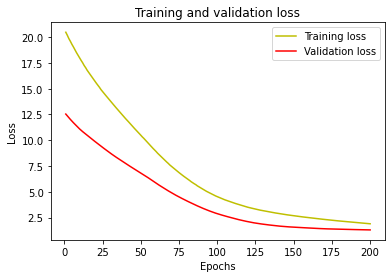

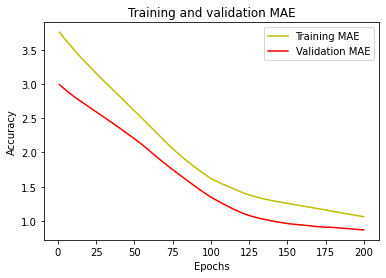

In [ ]:
## Plot the training and validation accuracy and loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Mean Squared Error (MSE) and Mean Absolute Error (MAE) for Neural Network model



In [ ]:
##############################################################
### NEURAL NETWORK

mse_nn, mae_nn = model_nn.evaluate(X_test_scaled, y_test)
print()
print('Mean squared error using Neural Network: ', mse_nn)
print('Mean absolute error using Neural Network: ', mae_nn)

1/1 [==============================] - 0s 15ms/step - loss: 2.3507 - mae: 1.2728

Mean squared error using Neural Network:  2.350727081298828
Mean absolute error using Neural Network:  1.2728207111358643


Multiple Linear Regression model

In [ ]:
##############################################################
### MULTIPLE LINEAR REGRESSION

model_lr = linear_model.LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  4.286871230441294
Mean absolute error from linear regression:  1.5947578423469921


Decision Tree model

In [ ]:
############################################################
## DECISION TREE

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train_scaled, y_train)
y_pred_dt = model_dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  4.330952380952381
Mean absolute error using decision tree:  1.480952380952381


Analysis of the importance of the features for Decision Tree model

In [ ]:
feature_list = list(X.columns)
feature_imp = pd.Series(model_dt.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lung Opacity                  0.721602
Fracture                      0.063851
Mass                          0.055207
Atelectasis                   0.039310
InceptionV3                   0.027990
Effusion                      0.017139
Lung Lesion                   0.013781
Infiltration                  0.011610
Fibrosis                      0.009970
Emphysema                     0.009724
vgg16                         0.009657
Consolidation                 0.006345
Pleural_Thickening            0.005828
Edema                         0.005148
Nodule                        0.001452
resnet50                      0.000738
Pneumonia                     0.000326
Enlarged Cardiomediastinum    0.000322
Cardiomegaly                  0.000000
Hernia                        0.000000
Pneumothorax                  0.000000
DenseNet121                   0.000000
Xception                      0.000000
dtype: float64


Random Forest model

In [ ]:
##############################################
## RANDOM FOREST

model_rf = RandomForestRegressor(n_estimators = 30, random_state=30)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Mean squared error using Random Forest: ', mse_rf)
print('Mean absolute error Using Random Forest: ', mae_rf)

Mean squared error using Random Forest:  2.6825698412698418
Mean absolute error Using Random Forest:  1.2433333333333334


Analysis of the importance of the features for Random Forest model

In [ ]:
feature_list = list(X.columns)
feature_imp = pd.Series(model_rf.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lung Opacity                  0.664223
Pneumothorax                  0.030353
Cardiomegaly                  0.029118
Mass                          0.027211
Emphysema                     0.025127
Pneumonia                     0.024913
InceptionV3                   0.023365
Effusion                      0.022936
Infiltration                  0.022894
Pleural_Thickening            0.020634
Nodule                        0.016049
resnet50                      0.013393
vgg16                         0.012653
Atelectasis                   0.009400
Hernia                        0.009165
Lung Lesion                   0.008485
Enlarged Cardiomediastinum    0.008429
Consolidation                 0.007849
DenseNet121                   0.006698
Edema                         0.005754
Xception                      0.005125
Fibrosis                      0.004644
Fracture                      0.001583
dtype: float64


XGBoost model

In [ ]:
###################################
## XGBOOST

model_xgbr = XGBRegressor(verbosity=0)
model_xgbr.fit(X_train_scaled, y_train)
y_pred_xgbr = model_xgbr.predict(X_test_scaled)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
mae_xgbr = mean_absolute_error(y_test, y_pred_xgbr)
print('Mean squared error using XGBoost: ', mse_xgbr)
print('Mean absolute error Using XGBoost: ', mae_xgbr)

Mean squared error using XGBoost:  3.1438348566771737
Mean absolute error Using XGBoost:  1.357035315604437


Analysis of the importance of the features XGBoost model

In [ ]:
feature_list = list(X.columns)
feature_imp = pd.Series(model_xgbr.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lung Opacity                  0.578712
Cardiomegaly                  0.057476
Mass                          0.042301
Pneumothorax                  0.041201
Pneumonia                     0.035228
Xception                      0.035216
resnet50                      0.031969
Fracture                      0.030229
Consolidation                 0.024654
Nodule                        0.021467
Pleural_Thickening            0.014804
Enlarged Cardiomediastinum    0.014543
InceptionV3                   0.013590
Atelectasis                   0.012134
Lung Lesion                   0.008164
Effusion                      0.008087
Emphysema                     0.007139
vgg16                         0.006835
Infiltration                  0.004919
Hernia                        0.004396
DenseNet121                   0.003922
Fibrosis                      0.001785
Edema                         0.001229
dtype: float32


Resume of metrics for the 5 trained machine learning models 

In [ ]:
nombre_modelos = ['Neural Nets', 'Multiple Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
MSE = [mse_nn, mse_lr, mse_dt, mse_rf, mse_xgbr]
MAE = [mae_nn, mae_lr, mae_dt, mae_rf, mae_xgbr]
dict_metrics_gm = {'Modelos':nombre_modelos, 'Mean Squared Error':MSE, 'Mean Absolute Error': MAE}
df_metrics_gm = pd.DataFrame(dict_metrics_gm)
df_metrics_gm

,Modelos,Mean Squared Error,Mean Absolute Error
0,Neural Nets,2.350727,1.272821
1,Multiple Linear Regression,4.286871,1.594758
2,Decision Tree,4.330952,1.480952
3,Random Forest,2.682570,1.243333
4,XGBoost,3.143835,1.357035


Linear Regression Model for "Lung Opacity vs Geographic Mean"

Extraction of Lung opacity and geographic mean values

In [ ]:
df_vs_gm = df_all_gm[['Lung Opacity','geographic_mean']]
df_vs_gm

,Lung Opacity,geographic_mean
0,-0.864325,2.3
1,-1.379524,4.0
2,-0.753431,4.7
3,-0.032212,5.7
4,0.660750,2.0
...,...,...
77,-0.451698,4.7
78,0.281588,4.0
79,0.387156,4.7
80,-1.704252,0.7


Extraction of the X and y values for linear regression

In [ ]:
X = df_vs_gm.loc[:, ['Lung Opacity']].copy()
y = df_vs_gm['geographic_mean']

print(X.shape, y.shape)

(82, 1) (82,)


Plotting of Geographic mean vs Lung opacity

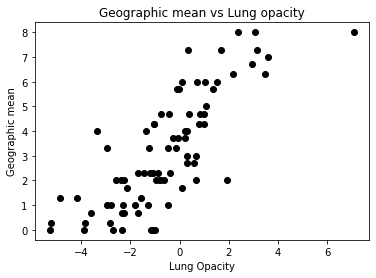

In [ ]:
plt.scatter(X, y, color='black')
plt.title('Geographic mean vs Lung opacity')
plt.xlabel('Lung Opacity')
plt.ylabel('Geographic mean')
plt.show()

Splitting the data for training and testing with a ratio of 0.6 for testing 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32, 1) (50, 1) (32,) (50,)


Scaling the data

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression model for Geographic mean vs Lung opacity

In [ ]:
model_linear = linear_model.LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
correlation_linear = scipy.stats.pearsonr(y_pred_linear, y_test)[0]
print('Mean squared error from linear regression: ', mse_linear)
print('Mean absolute error from linear regression: ', mae_linear)
print('R2:', r2_linear)
print('Correlation:', correlation_linear)

Mean squared error from linear regression:  1.9948817087688442
Mean absolute error from linear regression:  1.159416359416606
R2: 0.6593030123893233
Correlation: 0.8168088138114264


Coefficient of linear regression, interception and equation of the regresion model

In [ ]:
print('Coefficient of Linear Regression:', model_linear.coef_[0])
print('Interception:', model_linear.intercept_)
print()
print('Equation: y = {}*x + {}'.format(str(model_linear.coef_[0]), str(model_linear.intercept_)))

Coefficient of Linear Regression: 1.4102245947286929
Interception: 2.871875

Equation: y = 1.4102245947286929*x + 2.871875


Plotting the results

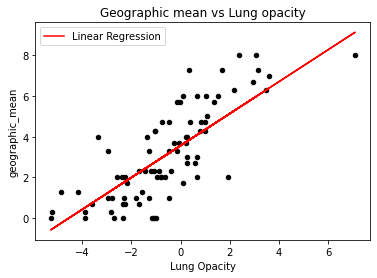

In [ ]:
ax = df_vs_gm.plot.scatter(x='Lung Opacity', y='geographic_mean', color='black')
ax.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
ax.set_title('Geographic mean vs Lung opacity')
ax.legend()

Resume of the metrics for the complete models

In [ ]:
new_row = {'Modelos':'Linear Regresion (Lung Opacity)', 'Mean Squared Error':mse_linear, 'Mean Absolute Error':mae_linear}
df_metrics_gm = df_metrics_gm.append(new_row, ignore_index=True)
df_metrics_gm

,Modelos,Mean Squared Error,Mean Absolute Error
0,Neural Nets,2.350727,1.272821
1,Multiple Linear Regression,4.286871,1.594758
2,Decision Tree,4.330952,1.480952
3,Random Forest,2.682570,1.243333
4,XGBoost,3.143835,1.357035
5,Linear Regresion (Lung Opacity),1.994882,1.159416


#Analysis for 18 pathologies + 5 probabilites (Opacity Mean)

Extracting 23 features and its label

In [ ]:
names_pathol = list(df_data_om.columns[1:19])
names_prob = list(df_data_om.columns[20:25])
name_om = [df_data_om.columns[19]]
names_pathol_prob = names_pathol + names_prob + name_om
df_all_om = df_data_om[names_pathol_prob]
df_all_om

,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Lung Lesion,Fracture,Lung Opacity,Enlarged Cardiomediastinum,DenseNet121,InceptionV3,resnet50,vgg16,Xception,opacity_mean
0,-1.995463,-2.250835,-2.319615,-3.428214,-8.006400,-6.877346,-4.031230,-1.672731,-5.218715,-3.404117,-4.661779,-2.777763,-0.158225,-5.696409,-6.134421,-3.529992,-0.864325,-2.181635,0.851559,0.871329,0.913002,0.069072,0.998013,1.3
1,-2.284326,-4.367359,-2.385848,-5.089296,-10.857897,-7.155473,-2.594435,-3.705988,-6.537526,-3.225794,-4.704632,-3.100978,-0.781046,-2.579316,-12.197935,-3.383951,-1.379524,-4.105000,0.960704,0.150587,0.847197,0.958360,0.970292,3.0
2,-2.176806,-3.614070,-2.414206,-3.824801,-8.485291,-6.886006,-3.519685,-2.881644,-7.652413,-3.460787,-3.667775,-1.921321,-0.330128,-3.950301,-6.181408,-2.754359,-0.753431,-3.419982,0.641163,0.786716,0.410167,0.990818,0.999502,3.0
3,-2.716297,-3.918124,-1.960546,-3.291000,-9.475438,-7.721296,-5.336512,-3.587376,-9.994222,-4.568360,-3.194962,-2.231982,-0.787121,-5.019547,-5.820308,-2.532609,-0.032212,-3.053708,0.782235,0.851945,0.393671,0.996665,0.360342,3.7
4,-2.065649,-2.314026,-1.301638,-4.320744,-2.661332,-7.755165,-4.507202,-1.229500,-1.323991,-4.131345,-0.686836,-3.710819,-3.513136,-7.139474,-7.976898,-4.147092,0.660750,-1.587787,0.999453,0.985737,0.998424,0.999216,0.999166,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-2.247870,-2.695761,-0.932922,-5.468601,-1.497197,-5.348270,-2.066755,-3.267211,-1.935185,-3.216589,-1.510092,-2.148279,-2.634754,-7.641832,-2.866753,-3.669294,-0.451698,-2.525874,0.999360,0.999991,0.992401,0.998774,1.000000,2.7
78,-1.204691,-2.154405,-0.693697,-4.653790,-0.989784,-6.958145,-3.083191,-1.447739,-2.728833,-4.454429,-0.893002,-2.856616,-2.519794,-4.358291,-3.592949,-3.895416,0.281588,-2.383605,0.999625,0.999537,0.987859,0.999095,1.000000,3.3
79,-1.337873,-1.917539,-0.742821,-4.561998,-2.193726,-5.323779,-4.394251,-1.312465,-2.222228,-4.245948,-1.477661,-2.255113,-1.368516,-6.786782,-2.221639,-3.056663,0.387156,-1.724825,0.999914,0.993296,0.933430,0.999972,1.000000,4.0
80,-2.920534,-3.951263,-1.233765,-5.946329,-6.810845,-5.927144,-3.987623,-4.672496,-1.747967,-4.772371,-4.642920,-2.352367,-3.957139,-5.675848,-9.433144,-4.329388,-1.704252,-5.290677,0.928157,0.999905,0.821510,0.998875,0.999839,0.7


Taking 23 features as x1, x2, x3 ...., and opacity mean as label y1

In [ ]:
X = df_all_om.drop('opacity_mean', axis=1)
y = df_all_om.opacity_mean.copy()
print(X.shape, y.shape)

(82, 23) (82,)


Splitting data for Neural network model with a ratio of 0.25 for testing dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(61, 23) (61,) (21, 23) (21,)


Scaling the data

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Neural Network model

In [ ]:
# Defining the model

model_nn = Sequential()
model_nn.add(Dense(10, input_dim=23, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

model_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model_nn.summary()

history = model_nn.fit(X_train_scaled, y_train, validation_split=0.1, epochs=200)

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 10)                240       
_________________________________________________________________
dense_168 (Dense)            (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] - 0s 140ms/step - loss: 14.6718 - mae: 3.4750 - val_loss: 9.3014 - val_mae: 2.6837
Epoch 2/200
2/2 [==============================] - 0s 19ms/step - loss: 14.3975 - mae: 3.4387 - val_loss: 9.2018 - val_mae: 2.6645
Epoch 3/200
2/2 [==============================] - 0s 18ms/step - loss: 14.1347 - mae: 3.4057 - val_loss: 9.1021 - val_mae: 2.6448
Epoch 4/200
2/2 [==============================] - 0s 52ms/step - loss: 13.9172 - mae: 3.3741 - val_loss: 9.0058 - val_mae:

Showing the performance of the model

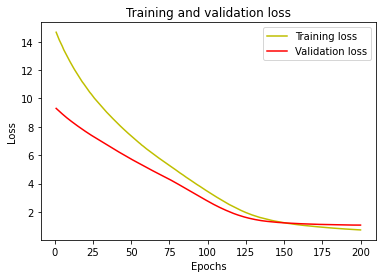

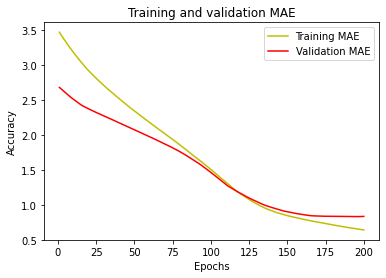

In [ ]:
## Plot the training and validation accuracy and loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Mean Squared Error (MSE) and Mean Absolute Error (MAE) for Neural Network model


In [ ]:
##############################################################
### NEURAL NETWORK

mse_nn, mae_nn = model_nn.evaluate(X_test_scaled, y_test)
print()
print('Mean squared error using Neural Network: ', mse_nn)
print('Mean absolute error using Neural Network: ', mae_nn)

1/1 [==============================] - 0s 17ms/step - loss: 2.3410 - mae: 1.3005

Mean squared error using Neural Network:  2.3409690856933594
Mean absolute error using Neural Network:  1.3005093336105347


Multiple Linear Regression model

In [ ]:
##############################################################
### MULTIPLE LINEAR REGRESSION

model_lr = linear_model.LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  1.9340285238215018
Mean absolute error from linear regression:  1.0698048683236248


Decision Tree model

In [ ]:
############################################################
## DECISION TREE

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train_scaled, y_train)
y_pred_dt = model_dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  1.9233333333333333
Mean absolute error using decision tree:  1.0523809523809524


Analysis of the importance of the features for Decision Tree model

In [ ]:
feature_list = list(X.columns)
feature_imp = pd.Series(model_dt.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lung Opacity                  0.517845
Pleural_Thickening            0.126528
Cardiomegaly                  0.126034
Pneumonia                     0.088284
Xception                      0.027913
resnet50                      0.026184
InceptionV3                   0.019079
Effusion                      0.013401
Edema                         0.012528
Consolidation                 0.010088
Fracture                      0.009527
Pneumothorax                  0.008088
Hernia                        0.005984
vgg16                         0.004263
Infiltration                  0.002179
Emphysema                     0.000897
DenseNet121                   0.000504
Atelectasis                   0.000336
Lung Lesion                   0.000336
Fibrosis                      0.000000
Mass                          0.000000
Enlarged Cardiomediastinum    0.000000
Nodule                        0.000000
dtype: float64


Random Forest model

In [ ]:
##############################################
## RANDOM FOREST

model_rf = RandomForestRegressor(n_estimators = 30, random_state=30)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Mean squared error using Random Forest: ', mse_rf)
print('Mean absolute error Using Random Forest: ', mae_rf)

Mean squared error using Random Forest:  1.0026328042328043
Mean absolute error Using Random Forest:  0.8266666666666664


Analysis of the importance of the features for Random Forest model

In [ ]:
feature_list = list(X.columns)
feature_imp = pd.Series(model_rf.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lung Opacity                  0.453862
Effusion                      0.145907
resnet50                      0.057997
DenseNet121                   0.045345
Mass                          0.040194
Consolidation                 0.039924
Pneumonia                     0.024429
Cardiomegaly                  0.019914
Atelectasis                   0.019758
InceptionV3                   0.018453
Hernia                        0.018090
Nodule                        0.017094
Lung Lesion                   0.013869
Fracture                      0.013774
Emphysema                     0.012250
Enlarged Cardiomediastinum    0.011973
Infiltration                  0.010894
Pneumothorax                  0.010230
vgg16                         0.008857
Edema                         0.005007
Fibrosis                      0.004942
Pleural_Thickening            0.004344
Xception                      0.002894
dtype: float64


XGBoost model

In [ ]:
###################################
## XGBOOST

model_xgbr = XGBRegressor(verbosity=0)
model_xgbr.fit(X_train_scaled, y_train)
y_pred_xgbr = model_xgbr.predict(X_test_scaled)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
mae_xgbr = mean_absolute_error(y_test, y_pred_xgbr)
print('Mean squared error using XGBoost: ', mse_xgbr)
print('Mean absolute error Using XGBoost: ', mae_xgbr)

Mean squared error using XGBoost:  1.3232910370650888
Mean absolute error Using XGBoost:  0.9508911462057205


Analysis of the importance of the features for XGBoost model

In [ ]:
feature_list = list(X.columns)
feature_imp = pd.Series(model_xgbr.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lung Opacity                  0.417783
Effusion                      0.186403
DenseNet121                   0.075985
Cardiomegaly                  0.054723
resnet50                      0.034627
InceptionV3                   0.031098
Pleural_Thickening            0.030459
Mass                          0.020483
Hernia                        0.019300
Atelectasis                   0.015635
Pneumothorax                  0.013701
Consolidation                 0.012556
Emphysema                     0.012477
Lung Lesion                   0.012332
vgg16                         0.010843
Nodule                        0.009996
Pneumonia                     0.008283
Fibrosis                      0.007680
Enlarged Cardiomediastinum    0.006986
Edema                         0.006790
Xception                      0.005451
Fracture                      0.003331
Infiltration                  0.003075
dtype: float32


Resume of metrics for the 5 trained machine learning models 

In [ ]:
nombre_modelos = ['Neural Nets', 'Multiple Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
MSE = [mse_nn, mse_lr, mse_dt, mse_rf, mse_xgbr]
MAE = [mae_nn, mae_lr, mae_dt, mae_rf, mae_xgbr]
dict_metrics_om = {'Modelos':nombre_modelos, 'Mean Squared Error':MSE, 'Mean Absolute Error': MAE}
df_metrics_om = pd.DataFrame(dict_metrics_om)
df_metrics_om

,Modelos,Mean Squared Error,Mean Absolute Error
0,Neural Nets,2.340969,1.300509
1,Multiple Linear Regression,1.934029,1.069805
2,Decision Tree,1.923333,1.052381
3,Random Forest,1.002633,0.826667
4,XGBoost,1.323291,0.950891


Linear Regression Model for "Lung Opacity vs Opacity Mean"

Extraction of Lung opacity and opacity mean values

In [ ]:
df_vs_om = df_all_om[['Lung Opacity','opacity_mean']]
df_vs_om

,Lung Opacity,opacity_mean
0,-0.864325,1.3
1,-1.379524,3.0
2,-0.753431,3.0
3,-0.032212,3.7
4,0.660750,2.0
...,...,...
77,-0.451698,2.7
78,0.281588,3.3
79,0.387156,4.0
80,-1.704252,0.7


Extraction of the X and y values for linear regression

In [ ]:
X = df_vs_om.loc[:, ['Lung Opacity']].copy()
y = df_vs_om['opacity_mean']

print(X.shape, y.shape)

(82, 1) (82,)


Plotting of Opacity mean vs Lung opacity

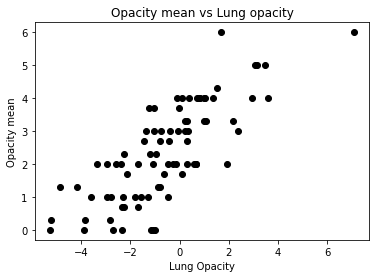

In [ ]:
plt.scatter(X, y, color='black')
plt.title('Opacity mean vs Lung opacity')
plt.xlabel('Lung Opacity')
plt.ylabel('Opacity mean')
plt.show()

Splitting the data for training and testing with a ratio of 0.6 for testing 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32, 1) (50, 1) (32,) (50,)


Scaling the data

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression model for Opacity mean vs Lung opacity

In [ ]:
model_linear = linear_model.LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
correlation_linear = scipy.stats.pearsonr(y_pred_linear, y_test)[0]
print('Mean squared error from linear regression: ', mse_linear)
print('Mean absolute error from linear regression: ', mae_linear)
print('R2:', r2_linear)
print('Correlation:', correlation_linear)

Mean squared error from linear regression:  0.9648230861804288
Mean absolute error from linear regression:  0.813363501824025
R2: 0.6094775972354732
Correlation: 0.7845058611349233


Coefficient of linear regression, interception and equation of the regresion model

In [ ]:
print('Coefficient of Linear Regression:', model_linear.coef_[0])
print('Interception:', model_linear.intercept_)
print()
print('Equation: y = {}*x + {}'.format(str(model_linear.coef_[0]), str(model_linear.intercept_)))

Coefficient of Linear Regression: 0.9323800409560014
Interception: 2.15

Equation: y = 0.9323800409560014*x + 2.15


Plotting the results

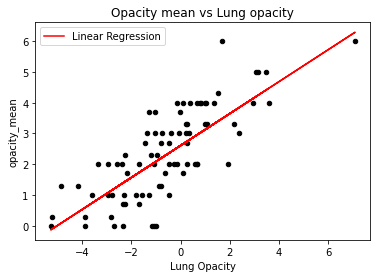

In [ ]:
ax = df_vs_om.plot.scatter(x='Lung Opacity', y='opacity_mean', color='black')
ax.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
ax.set_title('Opacity mean vs Lung opacity')
ax.legend()

Resume of the metrics for the complete models

In [ ]:
new_row = {'Modelos':'Linear Regresion (Lung Opacity)', 'Mean Squared Error':mse_linear, 'Mean Absolute Error':mae_linear}
df_metrics_om = df_metrics_om.append(new_row, ignore_index=True)
df_metrics_om

,Modelos,Mean Squared Error,Mean Absolute Error
0,Neural Nets,2.340969,1.300509
1,Multiple Linear Regression,1.934029,1.069805
2,Decision Tree,1.923333,1.052381
3,Random Forest,1.002633,0.826667
4,XGBoost,1.323291,0.950891
5,Linear Regresion (Lung Opacity),0.964823,0.813364
